**PARIS HOUSE CLASS**

The "Paris Housing Classification" dataset is a collection of real estate data from Paris.
 It includes data points related to housing attributes and is structured to allow the prediction of whether a house belongs to a certain category. This dataset is used particularly in classification, feature selection, and model evaluation, in the context of the Paris housing market.

It includes features such as the area of the house in square meters, the number of rooms,the overall price of the property and so on. The dataset's target variable is a binary indicator, which could represent whether a house falls into a specific category,such as basic or luxurious.

All attributes are numeric variables and they are listed bellow:

squareMeters

numberOfRooms

hasYard

hasPool

floors - number of floors

cityCode - zip code

cityPartRange - the higher the range, the more exclusive
the neighbourhood is

numPrevOwners - number of prevoious owners

made - year

isNewBuilt

hasStormProtector

basement - basement square meters

attic - attic square meteres

garage - garage size

hasStorageRoom

hasGuestRoom - number of guest rooms

price - price of a house

category - Luxury or Basic

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble as ensm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

import pickle

In [3]:
df=pd.read_csv('/content/drive/MyDrive/data science1/project/supervised project/ParisHousingClass.csv')

In [4]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


#evaluation

In [5]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [6]:
df.tail()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic
9999,1440,84,0,0,49,18412,6,10,1994,1,0,8485,2024,278,1,6,146708.4,Basic


In [7]:
df.shape

(10000, 18)

In [8]:
df.size

180000

In [9]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [11]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [12]:
for i in df.columns:
  print(df[i].unique(),i)
  print('*'*100)

[75523 80771 55712 ... 44403 83841 59036] squareMeters
****************************************************************************************************
[  3  39  58  47  19  36  10 100  42  21  74  31  44  60  88  37  43  64
  12  51  56  46  72   7  98  40  78  89  29  87   8  27  59  38  49  66
  22  97  25  52  11   6  82  17  57   9  15  48   5  28  20  67  99  73
  50  69   4  75  61  55  92  23  93  71  35  94  24  81  91  77  68  70
  54  45  63  84  34  76  96   1  90  95  18   2  53  41  26  16  13  65
  83  62  79  30  85  80  33  14  32  86] numberOfRooms
****************************************************************************************************
[0 1] hasYard
****************************************************************************************************
[1 0] hasPool
****************************************************************************************************
[ 63  98  19   6  90  17  99  11  61  15  21   5  77  69  67  16  10  50
  78  65  73  54   

In [13]:
for i in df.columns:
  print(df[i].value_counts(),i)
  print('*'*100)

squareMeters
47831    3
16006    3
36842    3
69665    3
68985    3
        ..
831      1
96352    1
76184    1
62328    1
59036    1
Name: count, Length: 9483, dtype: int64 squareMeters
****************************************************************************************************
numberOfRooms
54    129
4     120
22    119
47    118
3     116
     ... 
6      85
31     84
34     84
40     82
9      75
Name: count, Length: 100, dtype: int64 numberOfRooms
****************************************************************************************************
hasYard
1    5087
0    4913
Name: count, dtype: int64 hasYard
****************************************************************************************************
hasPool
0    5032
1    4968
Name: count, dtype: int64 hasPool
****************************************************************************************************
floors
97     126
55     122
77     117
28     116
3      116
      ... 
48      83
15      83
74      83
10

In [14]:
print(df.min())

squareMeters              89
numberOfRooms              1
hasYard                    0
hasPool                    0
floors                     1
cityCode                   3
cityPartRange              1
numPrevOwners              1
made                    1990
isNewBuilt                 0
hasStormProtector          0
basement                   0
attic                      1
garage                   100
hasStorageRoom             0
hasGuestRoom               0
price                10313.5
category               Basic
dtype: object


In [15]:
print(df.max())

squareMeters              99999
numberOfRooms               100
hasYard                       1
hasPool                       1
floors                      100
cityCode                  99953
cityPartRange                10
numPrevOwners                10
made                       2021
isNewBuilt                    1
hasStormProtector             1
basement                  10000
attic                     10000
garage                     1000
hasStorageRoom                1
hasGuestRoom                 10
price                10006771.2
category                 Luxury
dtype: object


In [16]:
print(df.isnull().sum())

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64


this dataset does not have null values

In [17]:
dpl_rows=df.duplicated().sum()
print(dpl_rows)

0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['category']=le.fit_transform(df.iloc[:,17])
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,0
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,0
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,0


where 0 indicate basic house and 1 indicate luxurious house

basic-0

luxury-1

checking the outliers using boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


squareMeters


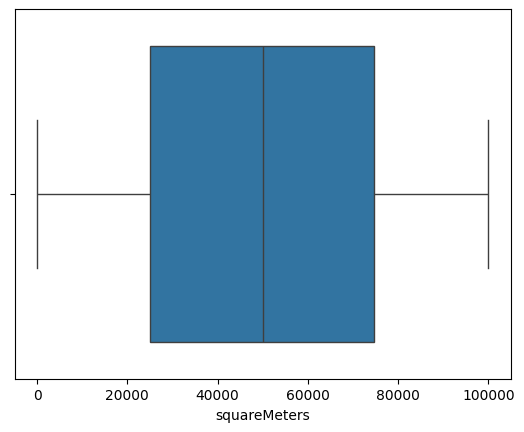

squareMeters ****************************************************************************************************
numberOfRooms


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


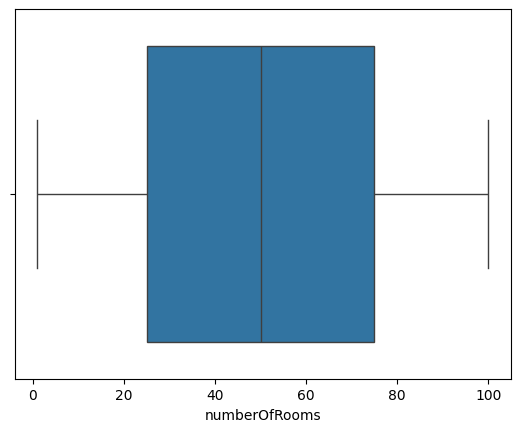

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


numberOfRooms ****************************************************************************************************
hasYard


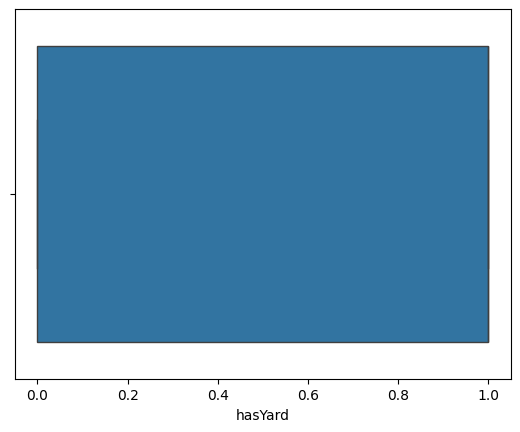

hasYard ****************************************************************************************************
hasPool


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


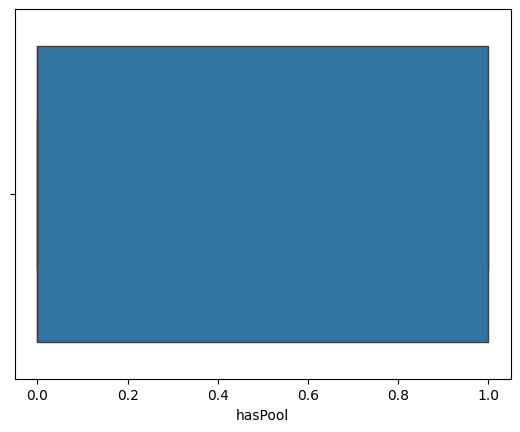

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


hasPool ****************************************************************************************************
floors


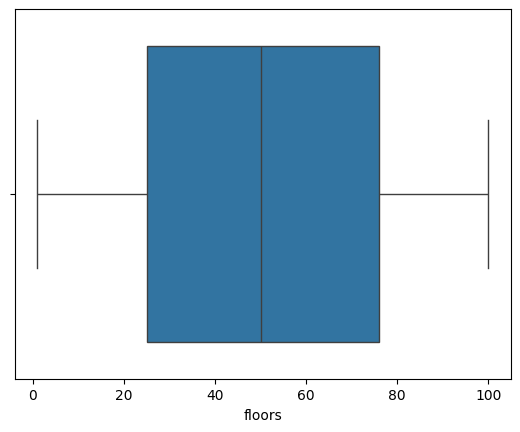

floors ****************************************************************************************************
cityCode


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


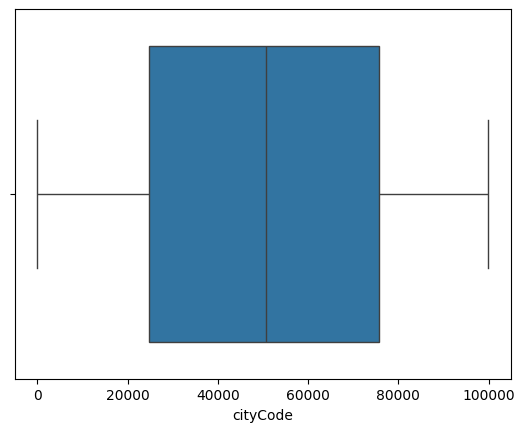

cityCode ****************************************************************************************************
cityPartRange


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


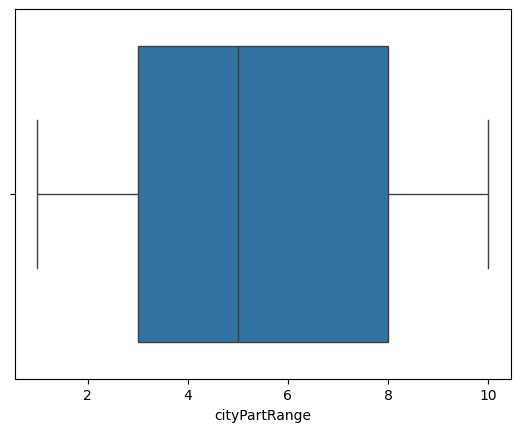

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


cityPartRange ****************************************************************************************************
numPrevOwners


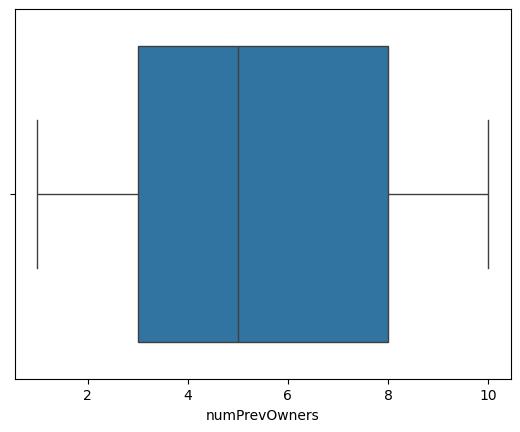

numPrevOwners ****************************************************************************************************
made


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


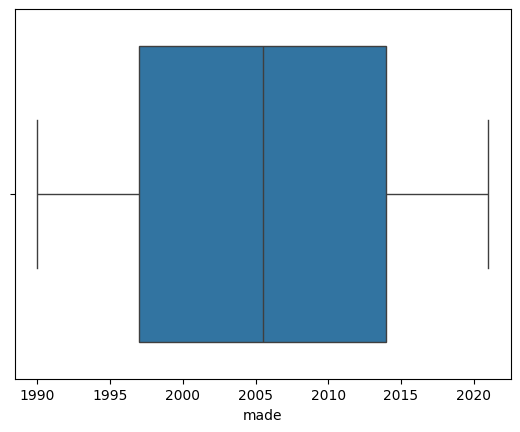

made ****************************************************************************************************
isNewBuilt


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


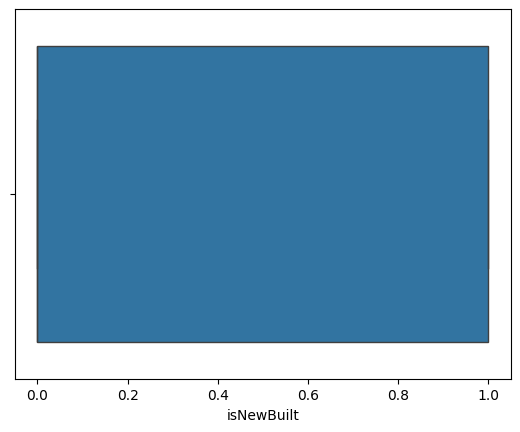

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


isNewBuilt ****************************************************************************************************
hasStormProtector


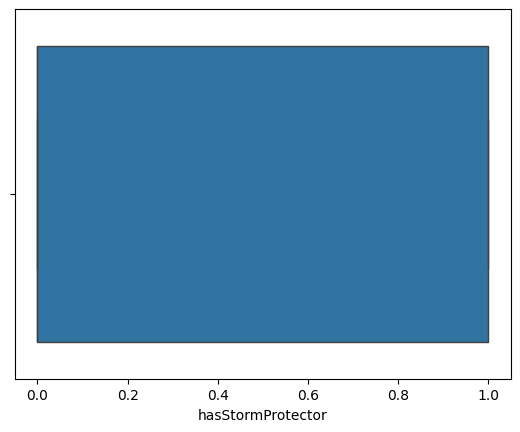

hasStormProtector ****************************************************************************************************
basement


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


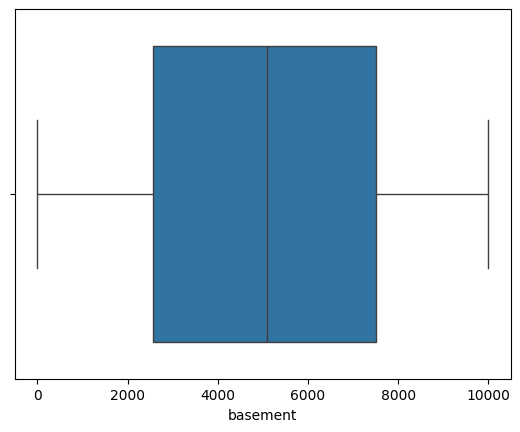

basement ****************************************************************************************************
attic


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


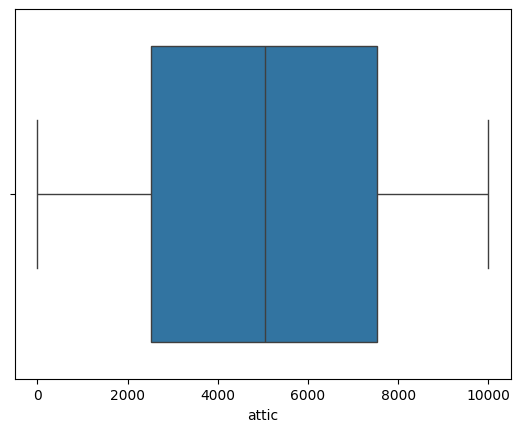

attic ****************************************************************************************************
garage


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


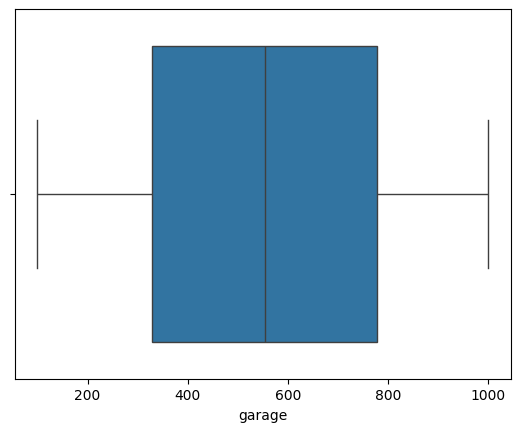

garage ****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


hasStorageRoom


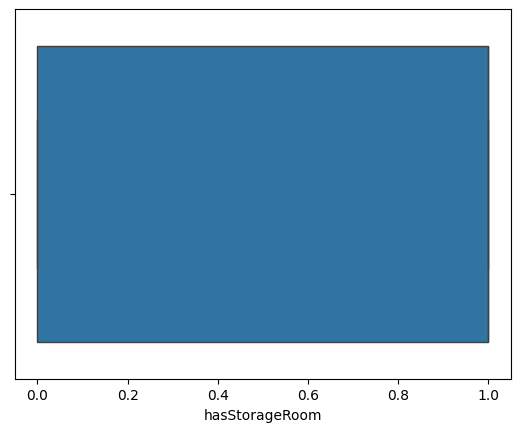

hasStorageRoom ****************************************************************************************************
hasGuestRoom


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


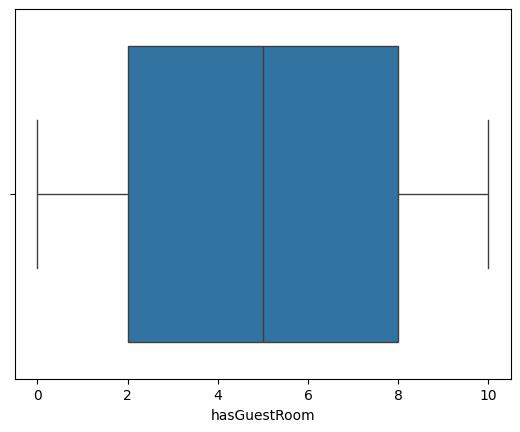

hasGuestRoom ****************************************************************************************************
price


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


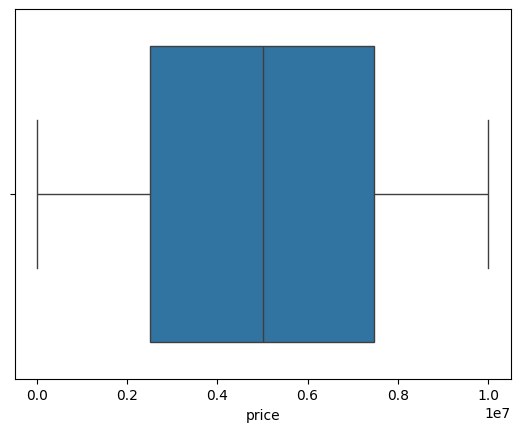

price ****************************************************************************************************
category


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


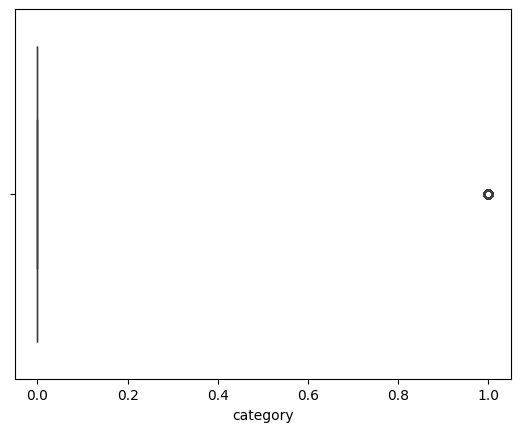

category ****************************************************************************************************


In [20]:
for i in df.columns:
  sns.boxplot(x=df[i])
  print(i)
  plt.show()
  print(i,'*'*100)

this data does not have any out layers

In [21]:
corln=df.corr()
corln

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999,-0.011800
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591,-0.000442
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119,0.373987
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070,0.382995
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654,-0.003827
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539,0.003950
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813,-0.003171
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619,-0.012843
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210,0.005399
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643,0.381237


In [22]:
corln=df.corr()['category']
corln

,category
squareMeters,-0.011800
numberOfRooms,-0.000442
hasYard,0.373987
hasPool,0.382995
floors,-0.003827
cityCode,0.003950
cityPartRange,-0.003171
numPrevOwners,-0.012843
made,0.005399
isNewBuilt,0.381237


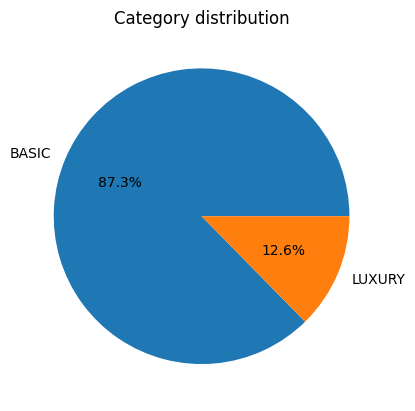

In [24]:
pr=df['category'].value_counts()

plt.pie(pr.values, labels=['BASIC','LUXURY'], autopct='%1.1f%%')
plt.title('Category distribution')
plt.show()

we have completed our evaluation and cleaning. now it is a clean dataset

#splitting

lets split the cleaned dataset for model building purpose.

the input features are assigned to x variable. and output column is assigned to y variable.

In [ ]:
x=df.drop('category',axis=1)
y=df['category']

In [ ]:
y.value_counts()

,count
category,
0,8735
1,1265


again splitting x and y for traing and testig purpose.

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

In [ ]:
ytrain.value_counts()

,count
category,
0,6981
1,1019


in this dataset class 1 have fewer samples than the class 0 therefore we are smotting it to make it balance.

In [ ]:
sm=SMOTE()
xres,yres=sm.fit_resample(xtrain,ytrain)

In [ ]:
yres.value_counts()

,count
category,
0,6981
1,6981


standardizing

to make model perform better we are standardizing.

In [ ]:
std=StandardScaler()

xtrain=std.fit_transform(xtrain)
xtest=std.fit_transform(xtest)
xres=std.fit_transform(xres)

model building:-

now lets step into building of models

#KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
help(knn)

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neigh

In [ ]:
ypred=knn.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ytest.value_counts()

,count
category,
0,1754
1,246


evaluation of knn

In [ ]:
trainscore=knn.score(xtrain,ytrain)
trainscore

1.0

In [ ]:
testscore=knn.score(xtest,ytest)
testscore

0.9915

In [ ]:
kacc=metrics.accuracy_score(ypred,ytest)
kacc

0.9915

In [ ]:
print(metrics.confusion_matrix(ypred,ytest))

[[1747   10]
 [   7  236]]


In [ ]:
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1757
           1       0.96      0.97      0.97       243

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [ ]:
metrics.recall_score(ypred,ytest)

0.9711934156378601

In [ ]:
metrics.precision_score(ypred,ytest)

0.959349593495935

In [ ]:
metrics.mean_squared_error(ypred,ytest)

0.0085

it is a overfit with training score 1 and testing score 0.995

and accuracy=0.991

predicting

In [ ]:
data=std.transform([[44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
data

array([[-0.18546151, -0.78702144,  0.62700487,  0.63077528, -1.41726224,
        -0.56198584,  1.36680762, -0.48978076, -1.80358087, -1.57344468,
         1.2422437 ,  1.52588244, -1.20483261, -1.32425182, -0.80620379,
        -1.64705266, -0.18532106]])

In [ ]:
op=knn.predict(data)
op

array([0])

using random search to optimize further and validate robustness.

In [ ]:
rknn=KNeighborsClassifier()

In [ ]:
param_dist={'n_neighbors':[3,5,7,9,11,None],'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [ ]:
help(rknn)

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neigh

In [ ]:
random=RandomizedSearchCV(rknn,param_distributions=param_dist,cv=10)

In [ ]:
random.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 7, 9, 11, None],
                                        'weights': ['uniform', 'distance']})

In [ ]:
print(random.best_params_)

{'weights': 'uniform', 'n_neighbors': 7, 'algorithm': 'kd_tree'}


In [ ]:
print(random.score(xtest,ytest))

0.994


again building model with the paramaters obtained by using random search

In [ ]:
rknn1=KNeighborsClassifier(n_neighbors=7,weights='distance',algorithm='kd_tree')

In [ ]:
rknn1.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7, weights='distance')

evaluating

In [ ]:
rry=rknn1.predict(xtest)
rry

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
rkacc=metrics.accuracy_score(rry,ytest)
rkacc

0.994

In [ ]:
rtr=rknn1.score(xtrain,ytrain)
rtr

1.0

In [ ]:
rts=rknn1.score(xtest,ytest)
rts

0.994

here after applying the random search in KNN model its accuracy has been increased to 0.994

before applying its accuracy was 0.9916

which indicates the model is overfit itself

#KNN by smotting

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn1.fit(xres,yres)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
ypred1=knn1.predict(xtest)
ypred1

array([0, 0, 1, ..., 0, 1, 0])

evaluation of smotted knn

In [ ]:
kacc1=metrics.accuracy_score(ypred1,ytest)
kacc1

0.7805

In [ ]:
metrics.mean_squared_error(ypred1,ytest)

0.2195

In [ ]:
metrics.confusion_matrix(ypred1,ytest)

array([[1315,    0],
       [ 439,  246]])

In [ ]:
print(metrics.classification_report(ypred1,ytest))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1315
           1       1.00      0.36      0.53       685

    accuracy                           0.78      2000
   macro avg       0.87      0.68      0.69      2000
weighted avg       0.84      0.78      0.74      2000



In [ ]:
trainscore1=knn1.score(xres,yres)
trainscore1

1.0

In [ ]:
testscore1=knn1.score(xtest,ytest)
testscore1

0.7805

knn without smotting has high accuracy than smotted

ie,

knn accuracy-0.995

smotted accuracy-0.789

knn is overfit and knn after smotting is also overfit

#Decision tree

In [ ]:
dt=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
ypre=dt.predict(xtest)
ypre

array([0, 0, 0, ..., 0, 0, 0])

evaluation

In [ ]:
trains=dt.score(xtrain,ytrain)
trains

1.0

In [ ]:
tests=dt.score(xtest,ytest)
tests

1.0

that model is overfit

In [ ]:
dacc=metrics.accuracy_score(ypre,ytest)
dacc

1.0

In [ ]:
metrics.confusion_matrix(ypre,ytest)

array([[1754,    0],
       [   0,  246]])

In [ ]:
print(metrics.classification_report(ypre,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
metrics.mean_squared_error(ypre,ytest)

0.0

[Text(0.3333333333333333, 0.875, 'x[9] <= 0.004\nentropy = 0.55\nsamples = 8000\nvalue = [6981.0, 1019.0]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 4017\nvalue = [4017, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= -0.007\nentropy = 0.82\nsamples = 3983\nvalue = [2964.0, 1019.0]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 1978\nvalue = [1978, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= -0.015\nentropy = 1.0\nsamples = 2005\nvalue = [986, 1019]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 986\nvalue = [986, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 1019\nvalue = [0, 1019]')]

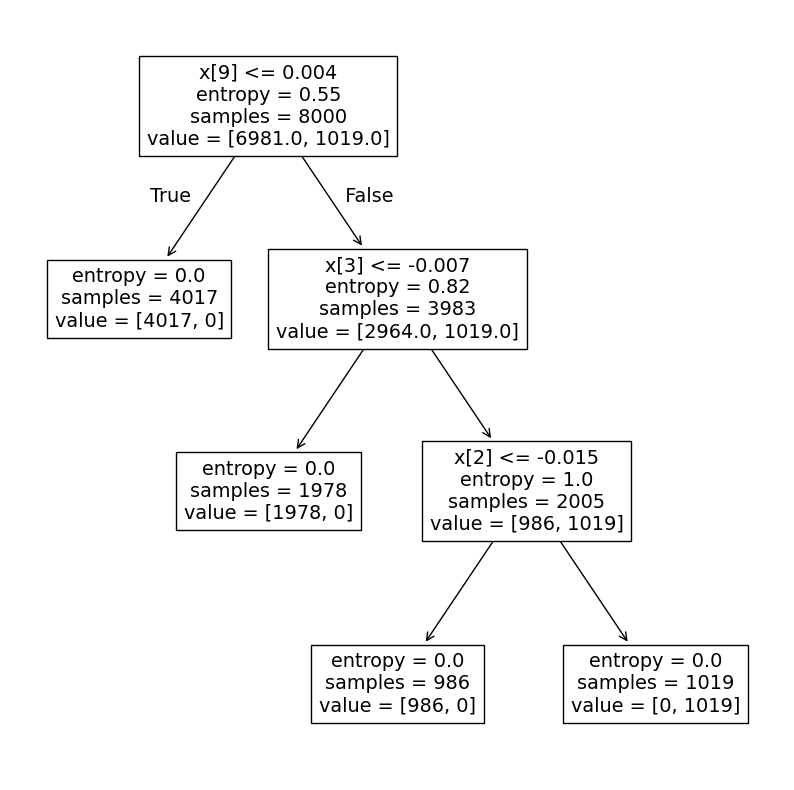

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt)

[Text(0.3333333333333333, 0.875, 'isNewBuilt <= 0.004\nentropy = 0.55\nsamples = 8000\nvalue = [6981.0, 1019.0]\nclass = 0'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 4017\nvalue = [4017, 0]\nclass = 0'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'hasPool <= -0.007\nentropy = 0.82\nsamples = 3983\nvalue = [2964.0, 1019.0]\nclass = 0'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 1978\nvalue = [1978, 0]\nclass = 0'),
 Text(0.6666666666666666, 0.375, 'hasYard <= -0.015\nentropy = 1.0\nsamples = 2005\nvalue = [986, 1019]\nclass = 1'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 986\nvalue = [986, 0]\nclass = 0'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 1019\nvalue = [0, 1019]\nclass = 1')]

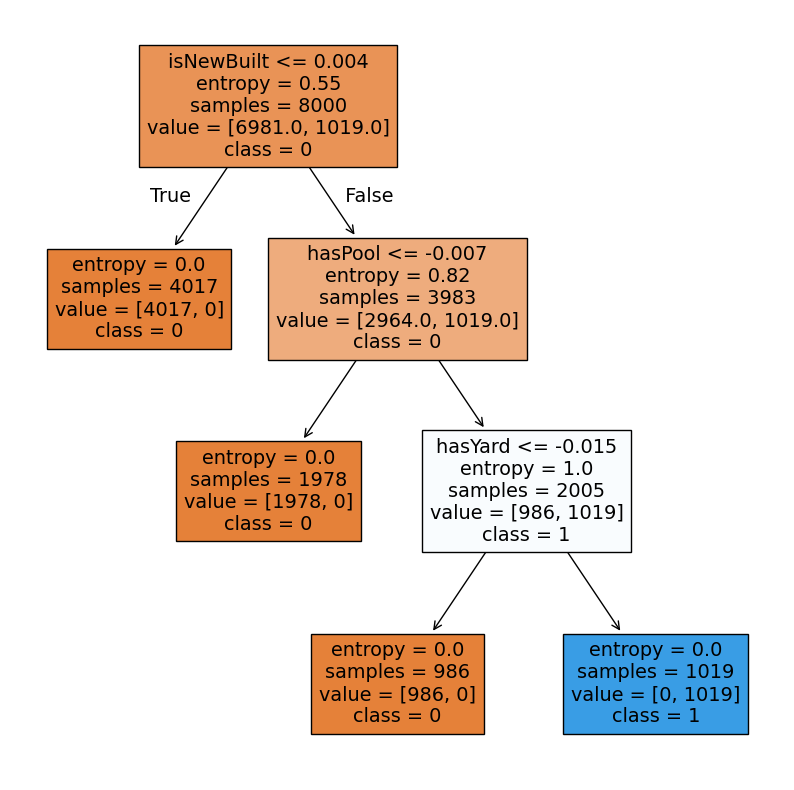

In [ ]:

plt.figure(figsize=(10,10))
tree.plot_tree(dt,feature_names=['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors','cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt','hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom','hasGuestRoom', 'price'],class_names=['0','1'],filled=True)

#smotted Decision tree

In [ ]:
dt1=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dt1.fit(xres,yres)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
ypre1=dt1.predict(xtest)
ypre1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
trains1=dt1.score(xres,yres)
trains1

1.0

In [ ]:
tests1=dt1.score(xtest,ytest)
tests1

1.0

In [ ]:
dacc1=metrics.accuracy_score(ypre1,ytest)
dacc1

1.0

there is no change in the accuracy after smotting

it reamins overfit

In [ ]:
metrics.confusion_matrix(ypre1,ytest)

array([[1754,    0],
       [   0,  246]])

In [ ]:
print(metrics.classification_report(ypre1,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
metrics.mean_squared_error(ypre1,ytest)

0.0

[Text(0.3333333333333333, 0.875, 'x[9] <= -0.469\nentropy = 1.0\nsamples = 13962\nvalue = [6981, 6981]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 4017\nvalue = [4017, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= -0.477\nentropy = 0.879\nsamples = 9945\nvalue = [2964.0, 6981.0]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 1978\nvalue = [1978, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= -0.484\nentropy = 0.54\nsamples = 7967\nvalue = [986, 6981]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 986\nvalue = [986, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 6981\nvalue = [0, 6981]')]

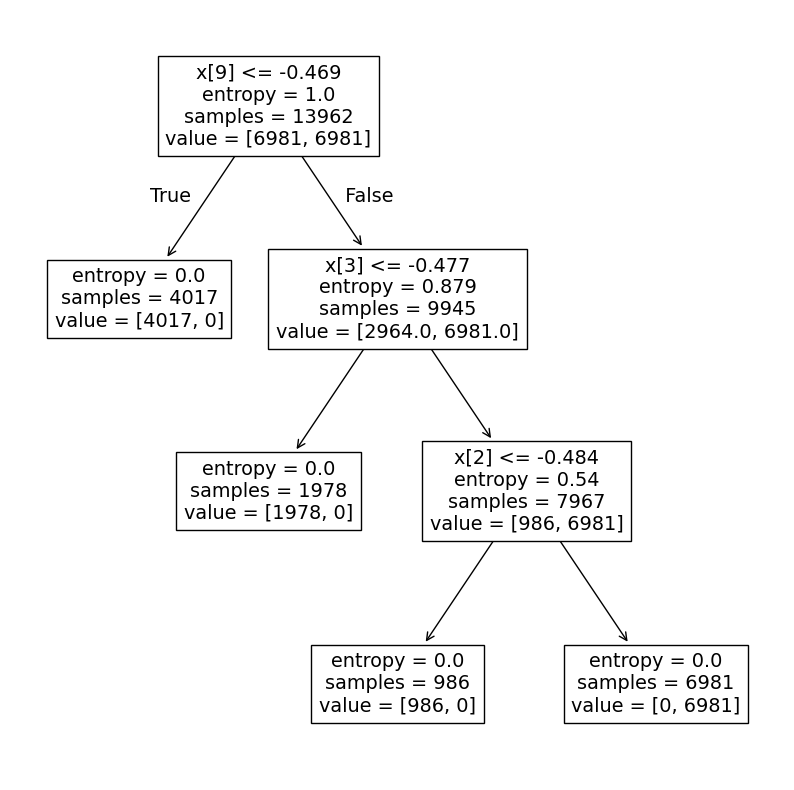

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt1)

[Text(0.3333333333333333, 0.875, 'isNewBuilt <= -0.469\nentropy = 1.0\nsamples = 13962\nvalue = [6981, 6981]\nclass = 0'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 4017\nvalue = [4017, 0]\nclass = 0'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'hasPool <= -0.477\nentropy = 0.879\nsamples = 9945\nvalue = [2964.0, 6981.0]\nclass = 1'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 1978\nvalue = [1978, 0]\nclass = 0'),
 Text(0.6666666666666666, 0.375, 'hasYard <= -0.484\nentropy = 0.54\nsamples = 7967\nvalue = [986, 6981]\nclass = 1'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 986\nvalue = [986, 0]\nclass = 0'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 6981\nvalue = [0, 6981]\nclass = 1')]

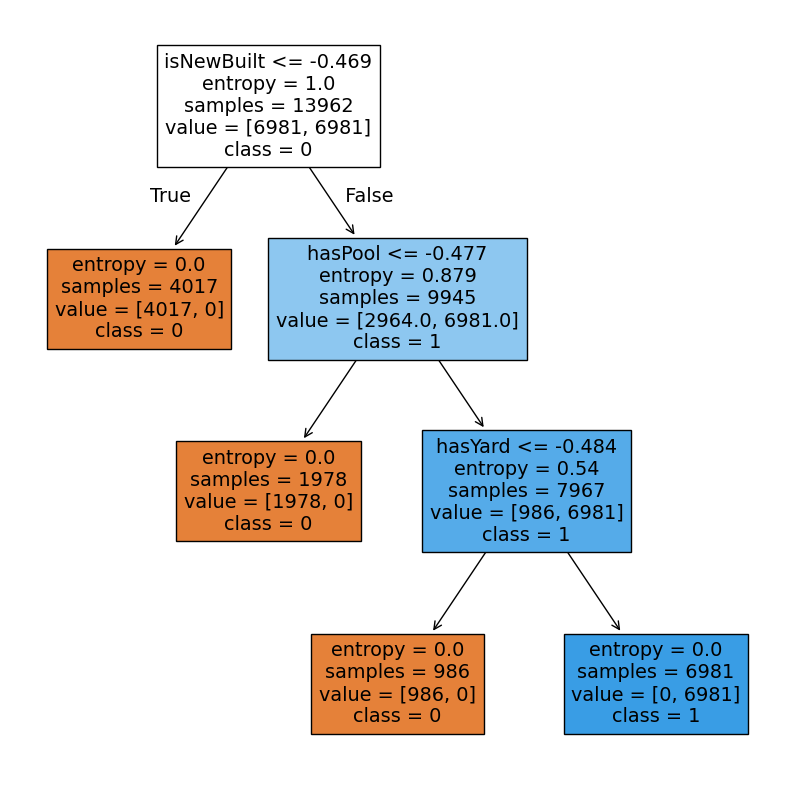

In [ ]:

plt.figure(figsize=(10,10))
tree.plot_tree(dt1,feature_names=['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors','cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt','hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom','hasGuestRoom', 'price'],class_names=['0','1'],filled=True)

#LOGISTIC REGRESSION

we are building logistic regression model since our dataset is a binary classification problem

In [ ]:
logr=LogisticRegression()
logr.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
ypr=logr.predict(xtest)
ypr

array([0, 0, 0, ..., 0, 0, 0])

evaluating

In [ ]:
trainsc=logr.score(xtrain,ytrain)
trainsc

1.0

In [ ]:
testsc=logr.score(xtest,ytest)
testsc

1.0

In [ ]:
lacc=metrics.accuracy_score(ypr,ytest)
lacc

1.0

traing and testing score 1 which indicates it is a overfit with highest aacuracy 1

In [ ]:
metrics.confusion_matrix(ypr,ytest)

array([[1754,    0],
       [   0,  246]])

In [ ]:
print(metrics.classification_report(ypr,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
metrics.mean_squared_error(ypr,ytest)

0.0

#smotted logistic regression

building logistic regression after smotting

In [ ]:
logr1=LogisticRegression()
logr1.fit(xres,yres)

LogisticRegression()

In [ ]:
ypr1=logr1.predict(xtest)
ypr1

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
trainsc1=logr1.score(xres,yres)
trainsc1

1.0

In [ ]:
testsc1=logr1.score(xtest,ytest)
testsc1

0.6325

In [ ]:
lacc1=metrics.accuracy_score(ypr1,ytest)
lacc1

0.6325

after smotting there is a significant reduction in the accuracy .

ie, the accuracy has reduced from 1 to 0.6325

and the model has became underfit

In [ ]:
metrics.confusion_matrix(ypr1,ytest)

array([[1019,    0],
       [ 735,  246]])

In [ ]:
print(metrics.classification_report(ypr1,ytest))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73      1019
           1       1.00      0.25      0.40       981

    accuracy                           0.63      2000
   macro avg       0.79      0.63      0.57      2000
weighted avg       0.79      0.63      0.57      2000



In [ ]:
metrics.mean_squared_error(ypr1,ytest)

0.3675

grid search

we are applying grid search to logistic regression after smotting to find best params to increase accuracy

In [ ]:
logr11=LogisticRegression()

In [ ]:
params= {'penalty' :['l1', 'l2', 'elasticnet', None],'dual' :[True,False],'fit_intercept' :[True,False],'multi_class' : ['auto', 'ovr', 'multinomial'],'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
cfl=GridSearchCV(logr11,params,cv=10,scoring='accuracy')
cfl.fit(xres,yres)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [ ]:
help(logr11)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-

In [ ]:
cfl.best_params_

{'dual': True,
 'fit_intercept': True,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'liblinear'}

after applying grid search we gave got a set of parameters.

then we are again building the model with that parameters.

In [ ]:
logr111=LogisticRegression(dual= True, fit_intercept= True, multi_class= 'auto', penalty='l2',solver='liblinear')

In [ ]:
logr111.fit(xres,yres)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(dual=True, multi_class='auto', solver='liblinear')

In [ ]:
lpred=logr111.predict(xtest)

In [ ]:
glacc=metrics.accuracy_score(ytest,lpred)
glacc

0.6325

as we can see there is no change in its accuracy after applying grid search

#Naive Bayes-gaussian

In [ ]:
nb=GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
yprr=nb.predict(xtest)
yprr

array([0, 0, 0, ..., 0, 0, 0])

evaluation

In [ ]:
trainee=nb.score(xtrain,ytrain)
trainee


1.0

In [ ]:
testee=nb.score(xtest,ytest)
testee

0.877

In [ ]:
gacc=metrics.accuracy_score(yprr,ytest)
gacc

0.877

In [ ]:
metrics.confusion_matrix(yprr,ytest)


array([[1754,  246],
       [   0,    0]])

In [ ]:
print(metrics.classification_report(yprr,ytest))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.88      2000
   macro avg       0.50      0.44      0.47      2000
weighted avg       1.00      0.88      0.93      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
metrics.mean_squared_error(yprr,ytest)

0.123

naive bayes gaussian achieved a perfect accuracy of 87% on the test set.


The model has perfectly classified the test data.

it indicates it is the best model with best fit and accuracy 0.877

#smotted naive bayes-gaussian

In [ ]:
nb1=GaussianNB()
nb1.fit(xres,yres)

GaussianNB()

In [ ]:
yprr1=nb1.predict(xtest)
yprr1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
trainee1=nb1.score(xres,yres)
trainee1

1.0

In [ ]:
testee1=nb1.score(xtest,ytest)
testee1

0.877

naive bayes model after smotting  there is no change.

In [ ]:
metrics.confusion_matrix(yprr1,ytest)


array([[1754,  246],
       [   0,    0]])

In [ ]:
gacc1=metrics.accuracy_score(yprr1,ytest)
gacc1

0.877

In [ ]:
print(metrics.classification_report(yprr1,ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.88      0.93      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.88      2000
   macro avg       0.50      0.44      0.47      2000
weighted avg       1.00      0.88      0.93      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
metrics.mean_squared_error(yprr1,ytest)

0.123

#BERNOULLI

In [ ]:
model=BernoulliNB()
model.fit(xtrain,ytrain)

BernoulliNB()

In [ ]:
yprb=model.predict(xtest)
yprb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
bacc=metrics.accuracy_score(yprb,ytest)
bacc

1.0

In [ ]:
print(metrics.classification_report(ytest,yprb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
print(metrics.confusion_matrix(ytest,yprb))

[[1754    0]
 [   0  246]]


In [ ]:
metrics.mean_squared_error(yprb,ytest)

0.0

In [ ]:
training_score=model.score(xtrain,ytrain)
training_score

1.0

In [ ]:
testing_score=model.score(xtest,ytest)
testing_score

1.0

in bernouli naive bayes the model is overfit with training and testing score 1 and accuracy 1

#smotted bernoulli

In [ ]:
model1=BernoulliNB()
model1.fit(xres,yres)

BernoulliNB()

In [ ]:
yprb1=model1.predict(xtest)
yprb1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
bacc1=metrics.accuracy_score(yprb1,ytest)
bacc1

1.0

In [ ]:
print(metrics.classification_report(ytest,yprb1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
print(metrics.confusion_matrix(ytest,yprb1))

[[1754    0]
 [   0  246]]


In [ ]:
metrics.mean_squared_error(yprb1,ytest)

0.0

In [ ]:
training_score1=model1.score(xres,yres)
training_score1

1.0

In [ ]:
testing_score1=model1.score(xtest,ytest)
testing_score1

1.0

there is no change after smotting

#SVM linear

linear

building svm model with linear kernel function

In [ ]:
svc=SVC(kernel='linear')
svc.fit(xtrain,ytrain)

SVC(kernel='linear')

In [ ]:
y1=svc.predict(xtest)
y1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
tr1 = svc.score(xtrain,ytrain)
tr1

1.0

In [ ]:
ts1=svc.score(xtest,ytest)
ts1

1.0

In [ ]:
slacc=metrics.accuracy_score(y1,ytest)
slacc

1.0

In [ ]:
metrics.confusion_matrix(y1,ytest)

array([[1754,    0],
       [   0,  246]])

In [ ]:
print(metrics.classification_report(y1,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
metrics.mean_squared_error(y1,ytest)

0.0

it is also the overfit with training and testing score 1 and acccuracy1

#smotted linear

In [ ]:
svc1=SVC(kernel='linear')
svc1.fit(xres,yres)

SVC(kernel='linear')

In [ ]:
y11=svc1.predict(xtest)
y11

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
tr11 = svc1.score(xres,yres)
tr11

1.0

In [ ]:
ts11=svc1.score(xtest,ytest)
ts11

0.6325

In [ ]:
slacc1=metrics.accuracy_score(y11,ytest)
slacc1

0.6325

In [ ]:
metrics.confusion_matrix(y11,ytest)

array([[1019,    0],
       [ 735,  246]])

In [ ]:
print(metrics.classification_report(y11,ytest))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73      1019
           1       1.00      0.25      0.40       981

    accuracy                           0.63      2000
   macro avg       0.79      0.63      0.57      2000
weighted avg       0.79      0.63      0.57      2000



In [ ]:
metrics.mean_squared_error(y11,ytest)

0.3675

after smotting the accuracy has been reduced .

before smotting it was 1 and after smotting it is 0.6325

it is underfit

#poly

In [ ]:
ply=SVC(kernel='poly')
ply.fit(xtrain,ytrain)

SVC(kernel='poly')

In [ ]:
y2=ply.predict(xtest)
y2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
spacc=metrics.accuracy_score(y2,ytest)
spacc

1.0

In [ ]:
metrics.confusion_matrix(ytest,y2)

array([[1754,    0],
       [   0,  246]])

In [ ]:
print(metrics.classification_report(ytest,y2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
metrics.mean_squared_error(y2,ytest)

0.0

In [ ]:
tr2=ply.score(xtrain,ytrain)
tr2

1.0

In [ ]:
ts2=ply.score(xtest,ytest)
ts2

1.0

overfit
accuracy 1

#smotted poly

In [ ]:
ply1=SVC(kernel='poly')
ply1.fit(xres,yres)

SVC(kernel='poly')

In [ ]:
y22=ply1.predict(xtest)
y22

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
spacc1=metrics.accuracy_score(y22,ytest)
spacc1

0.633

In [ ]:
metrics.confusion_matrix(ytest,y22)

array([[1020,  734],
       [   0,  246]])

In [ ]:
print(metrics.classification_report(y22,ytest))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74      1020
           1       1.00      0.25      0.40       980

    accuracy                           0.63      2000
   macro avg       0.79      0.63      0.57      2000
weighted avg       0.79      0.63      0.57      2000



In [ ]:
metrics.mean_squared_error(y22,ytest)

0.367

In [ ]:
tr22=ply1.score(xres,yres)
tr22

1.0

In [ ]:
ts22=ply1.score(xtest,ytest)
ts22

0.633

accuracy reduced from 1 to 0.633

it is overfit

#sigmoid

In [ ]:
svc3=SVC(kernel='sigmoid')
svc3.fit(xtrain,ytrain)

SVC(kernel='sigmoid')

In [ ]:
y3=svc3.predict(xtest)
y3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ssacc=metrics.accuracy_score(y3,ytest)
ssacc

0.9995

In [ ]:
metrics.confusion_matrix(ytest,y3)

array([[1753,    1],
       [   0,  246]])

In [ ]:
print(metrics.classification_report(ytest,y3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
tr3=svc3.score(xtrain,ytrain)
tr3

0.998375

In [ ]:
ts3=svc3.score(xtest,ytest)
ts3

0.9995

In [ ]:
metrics.mean_squared_error(y3,ytest)

0.0005

train-0.998

testscore-0.9995

accuracy-0.9995

#smotted sigmoid

In [ ]:
svc33=SVC(kernel='sigmoid')
svc33.fit(xres,yres)

SVC(kernel='sigmoid')

In [ ]:
y33=svc33.predict(xtest)
y33

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
ssacc1=metrics.accuracy_score(y33,ytest)
ssacc1

0.6505

In [ ]:
metrics.confusion_matrix(ytest,y33)

array([[1055,  699],
       [   0,  246]])

In [ ]:
print(metrics.classification_report(ytest,y33))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75      1754
           1       0.26      1.00      0.41       246

    accuracy                           0.65      2000
   macro avg       0.63      0.80      0.58      2000
weighted avg       0.91      0.65      0.71      2000



In [ ]:
tr33=svc33.score(xres,yres)
tr33

0.9986391634436327

In [ ]:
ts33=svc33.score(xtest,ytest)
ts33

0.6505

In [ ]:
metrics.mean_squared_error(y33,ytest)

0.3495

after smotting the accuracy has been reduced to 0.64

#rbf

In [ ]:
svc4=SVC(kernel='rbf')
svc4.fit(xtrain,ytrain)

SVC()

In [ ]:
y4=svc4.predict(xtest)
y4

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(metrics.classification_report(ytest,y4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
metrics.confusion_matrix(y4,ytest)

array([[1754,    0],
       [   0,  246]])

In [ ]:
sracc=metrics.accuracy_score(y4,ytest)
sracc

1.0

In [ ]:
metrics.mean_squared_error(y4,ytest)

0.0

In [ ]:
tr4=svc4.score(xtrain,ytrain)
tr4

1.0

In [ ]:
ts4=svc4.score(xtest,ytest)
ts4

1.0

overfit and accuracy-1

#smotted rbf

In [ ]:
svc44=SVC(kernel='rbf')
svc44.fit(xres,yres)

SVC()

In [ ]:
y44=svc44.predict(xtest)
y44

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
print(metrics.classification_report(ytest,y44))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78      1754
           1       0.28      1.00      0.44       246

    accuracy                           0.68      2000
   macro avg       0.64      0.82      0.61      2000
weighted avg       0.91      0.68      0.74      2000



In [ ]:
metrics.confusion_matrix(y44,ytest)

array([[1115,    0],
       [ 639,  246]])

In [ ]:
sracc1=metrics.accuracy_score(y44,ytest)
sracc1

0.6805

In [ ]:
metrics.mean_squared_error(y44,ytest)

0.3195

In [ ]:
tr44=svc44.score(xres,yres)
tr44

1.0

In [ ]:
ts44=svc44.score(xtest,ytest)
ts44

0.6805

after smotting the accuracy has been reduced from 1 to 0.681

ensamble learning

#bagging

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,max_features=5)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, max_features=5)

In [ ]:
help(rfc)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` paramet

In [ ]:
rpred=rfc.predict(xtest)
rpred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
rtraining_score=rfc.score(xtrain,ytrain)
rtraining_score

1.0

In [ ]:
rtesting_score=rfc.score(xtest,ytest)
rtesting_score

1.0

In [ ]:
rfacc=metrics.accuracy_score(ytest,rpred)
rfacc

1.0

Accuracy: 100%
Confusion Matrix:
Predicted "Basic" correctly: 2608
Predicted "Luxury" correctly: 392

The model has perfectly classified the test data. This could suggest that the dataset is either very straightforward for classification or the model might be overfitting

In [ ]:
print(metrics.classification_report(ytest,rpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
metrics.confusion_matrix(rpred,ytest)

array([[1754,    0],
       [   0,  246]])

In [ ]:
metrics.mean_squared_error(rpred,ytest)

0.0

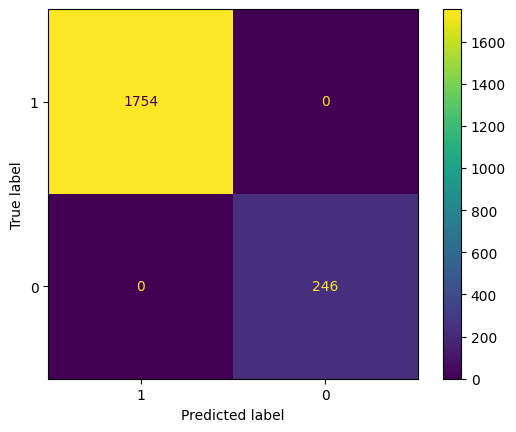

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

labels=['1','0']
cm=confusion_matrix(ytest,rpred)
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

to use streamlit we are using pickle

In [ ]:
# pickle.dump(rfc,open('random.sav','wb'))

In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.8
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.9.30.0.32.59
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread         

#smotted bagging

In [ ]:
rfc1=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,max_features=5)
rfc1.fit(xres,yres)

RandomForestClassifier(max_depth=5, max_features=5)

In [ ]:
rpred1=rfc1.predict(xtest)
rpred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
rtraining_score1=rfc1.score(xres,yres)
rtraining_score1

1.0

In [ ]:
rtesting_score1=rfc1.score(xtest,ytest)
rtesting_score1

1.0

In [ ]:
rfacc1=metrics.accuracy_score(ytest,rpred1)
rfacc1

1.0

In [ ]:
print(metrics.classification_report(ytest,rpred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
metrics.confusion_matrix(rpred1,ytest)

array([[1754,    0],
       [   0,  246]])

In [ ]:
metrics.mean_squared_error(rpred1,ytest)

0.0

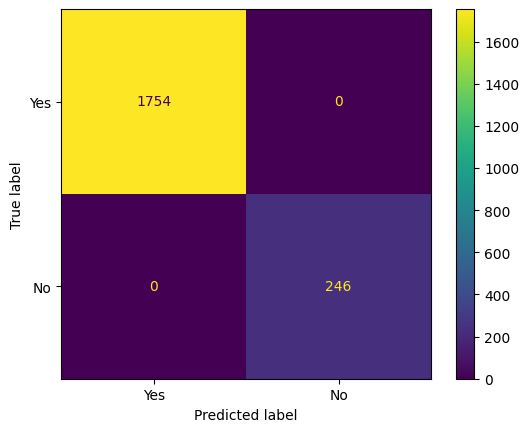

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

labels=['Yes','No']
cm=confusion_matrix(ytest,rpred1)
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

no change

#boosting

In [ ]:
adb=ensm.AdaBoostClassifier(n_estimators=10)
adb.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=10)

In [ ]:
help(adb)

Help on AdaBoostClassifier in module sklearn.ensemble._weight_boosting object:

class AdaBoostClassifier(sklearn.utils._metadata_requests._RoutingNotSupportedMixin, sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1]_ classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm based on [2]_.
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |     

In [ ]:
apred=adb.predict(xtest)
apred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
adacc=metrics.accuracy_score(ytest,apred)
adacc

1.0

In [ ]:
print(metrics.classification_report(ytest,apred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
atraining_score=adb.score(xtrain,ytrain)
atraining_score

1.0

In [ ]:
atesting_score=adb.score(xtest,ytest)
atesting_score

1.0

In [ ]:
metrics.confusion_matrix(ytest,apred)

array([[1754,    0],
       [   0,  246]])

In [ ]:
mse=metrics.mean_squared_error(ytest,apred)
mse

0.0

smotted boosting

In [ ]:
adb1=ensm.AdaBoostClassifier(n_estimators=10)
adb1.fit(xres,yres)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=10)

In [ ]:
apred1=adb1.predict(xtest)
apred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
adacc1=metrics.accuracy_score(ytest,apred1)
adacc1

1.0

In [ ]:
print(metrics.classification_report(ytest,apred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1754
           1       1.00      1.00      1.00       246

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
atraining_score1=adb1.score(xres,yres)
atraining_score1

1.0

In [ ]:
atesting_score1=adb1.score(xtest,ytest)
atesting_score1

1.0

In [ ]:
metrics.confusion_matrix(ytest,apred1)

array([[1754,    0],
       [   0,  246]])

In [ ]:
mse=metrics.mean_squared_error(ytest,apred)
mse

0.0

#streamlit

In [ ]:
pickle.dump(nb,open('naivebayes.sav','wb'))

In [ ]:
pickle.dump(std,open('standard.sav','wb'))

#results

**KNN**

<ipython-input-246-41cd005f3112>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


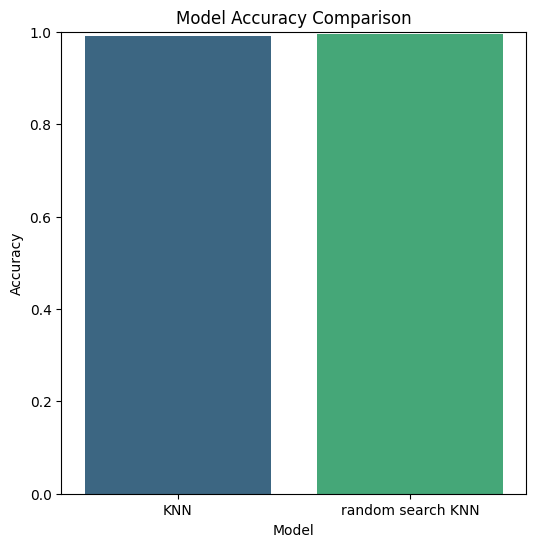

In [ ]:
model_n=['KNN','random search KNN']
accuracy=[kacc,rkacc]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

<ipython-input-247-7b410bf40fcd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


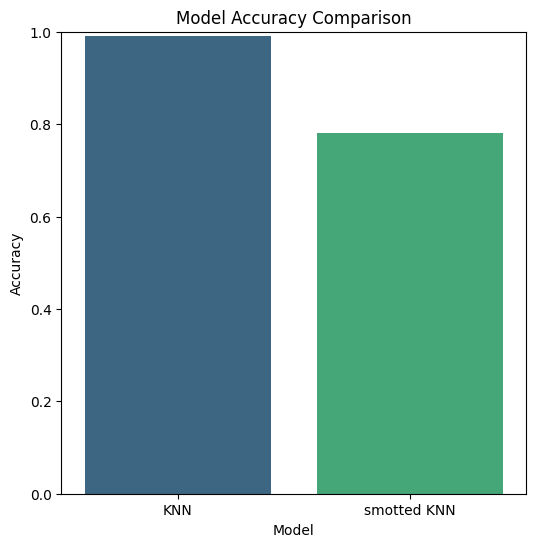

In [ ]:
model_n=['KNN','smotted KNN']
accuracy=[kacc,kacc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

**DECISION** **TREE**

<ipython-input-248-495a0d4a8abc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


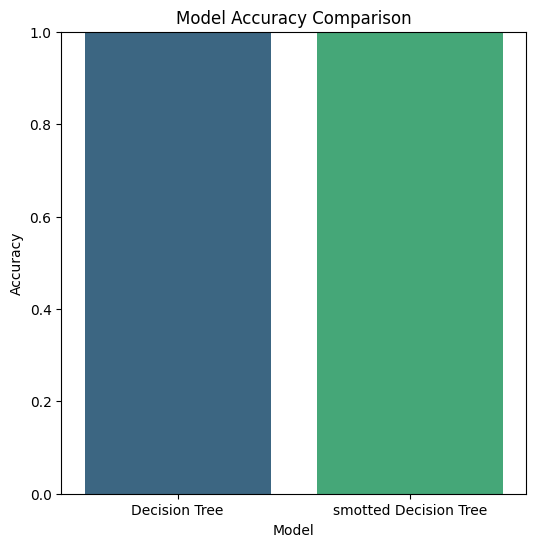

In [ ]:
model_n=['Decision Tree','smotted Decision Tree']
accuracy=[dacc,dacc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

**LOGISTIC** **REGRESSION**

<ipython-input-249-599a8f006583>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


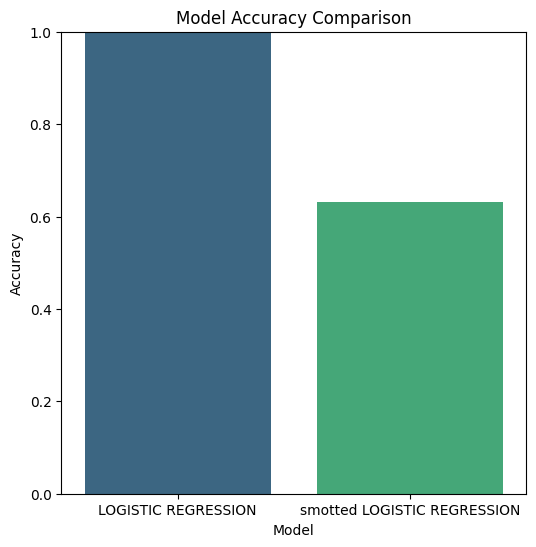

In [ ]:
model_n=['LOGISTIC REGRESSION','smotted LOGISTIC REGRESSION']
accuracy=[lacc,lacc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

<ipython-input-250-4d72fa233fe3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


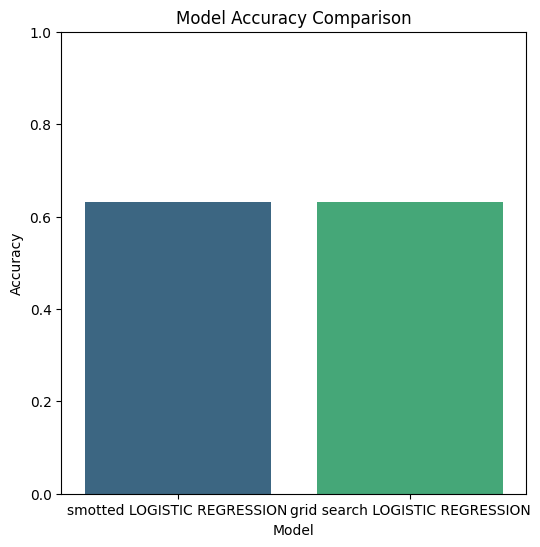

In [ ]:
model_n=['smotted LOGISTIC REGRESSION','grid search LOGISTIC REGRESSION']
accuracy=[lacc1,glacc]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

** NAIVE BAYES**

<ipython-input-251-7282d7f805ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


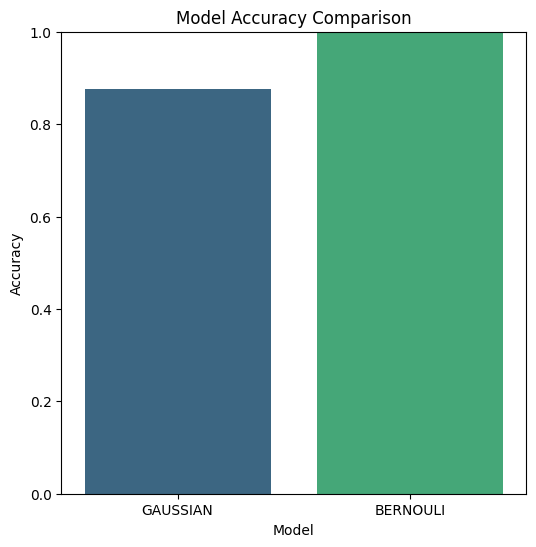

In [ ]:
model_n=['GAUSSIAN','BERNOULI']
accuracy=[gacc,bacc]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

<ipython-input-252-3e8a67cdf3e3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


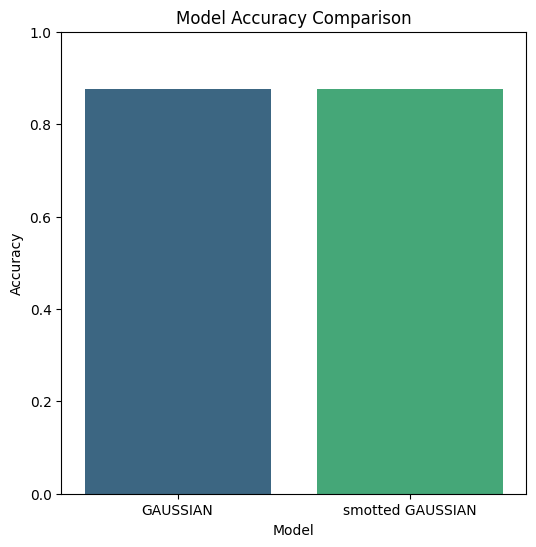

In [ ]:
model_n=['GAUSSIAN','smotted GAUSSIAN']
accuracy=[gacc,gacc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

<ipython-input-253-91fb5678e0c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


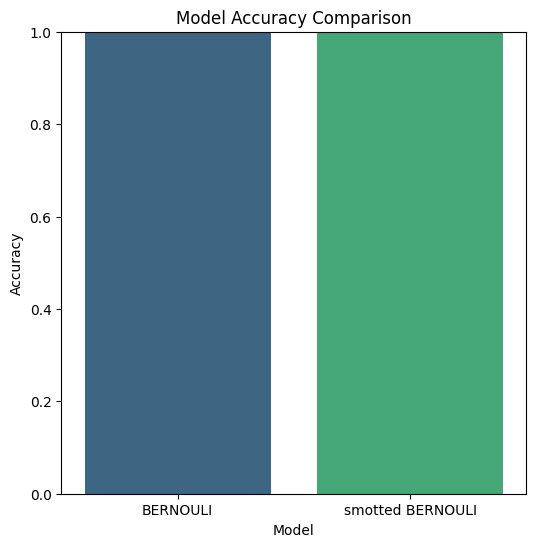

In [ ]:
model_n=['BERNOULI','smotted BERNOULI']
accuracy=[bacc,bacc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

**SVM**

<ipython-input-254-87521397f625>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-l

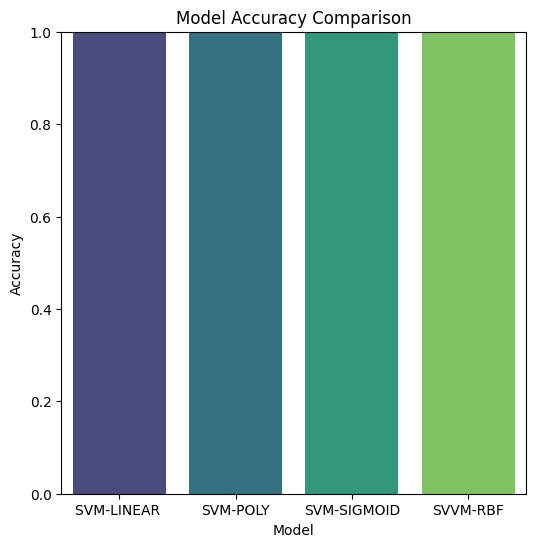

In [ ]:
model_n=['SVM-LINEAR ','SVM-POLY','SVM-SIGMOID','SVVM-RBF']
accuracy=[slacc,spacc,ssacc,sracc]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

<ipython-input-255-cb73b8025ca7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-l

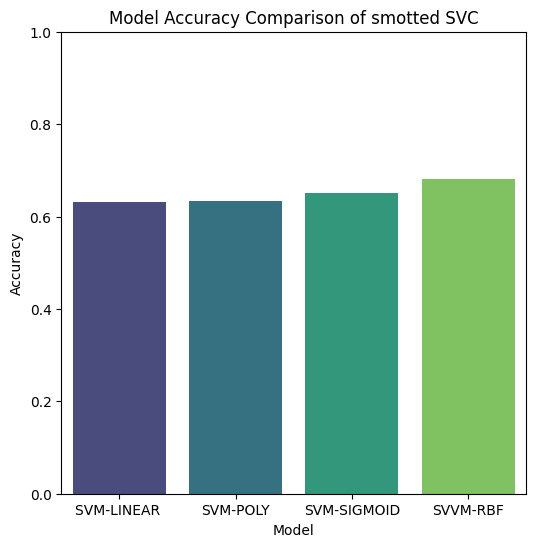

In [ ]:
model_n=['SVM-LINEAR ','SVM-POLY','SVM-SIGMOID','SVVM-RBF']
accuracy=[slacc1,spacc1,ssacc1,sracc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison of smotted SVC')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

<ipython-input-256-efe317474f35>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


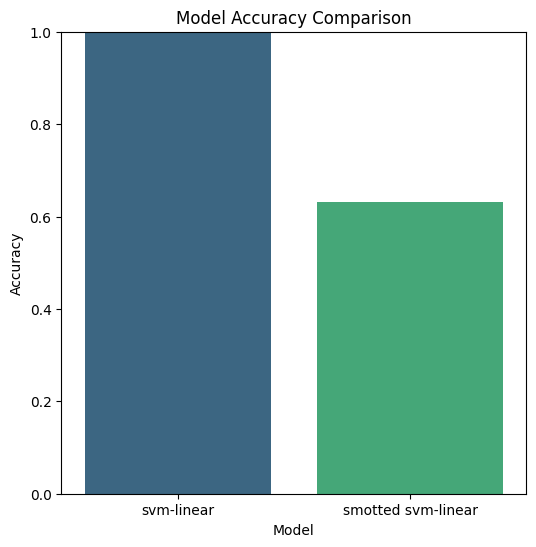

In [ ]:
model_n=['svm-linear','smotted svm-linear']
accuracy=[slacc,slacc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

<ipython-input-257-93b735d3039c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


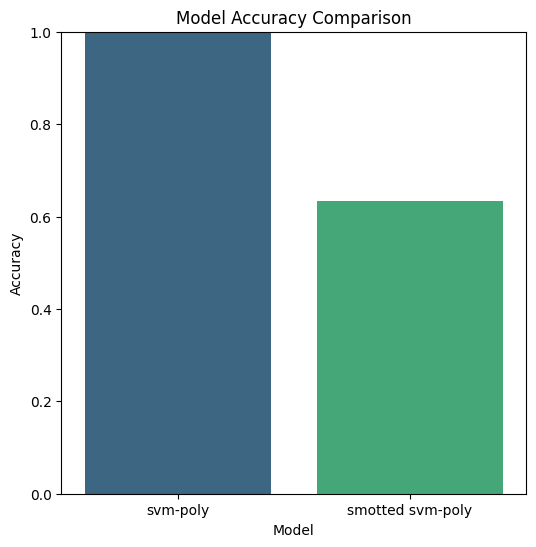

In [ ]:
model_n=['svm-poly','smotted svm-poly']
accuracy=[spacc,spacc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

<ipython-input-258-6f16fe498845>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


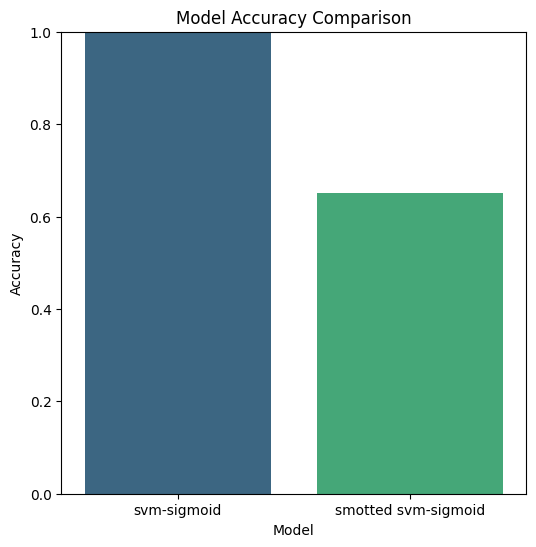

In [ ]:
model_n=['svm-sigmoid','smotted svm-sigmoid']
accuracy=[ssacc,ssacc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

<ipython-input-259-083550f27c3c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


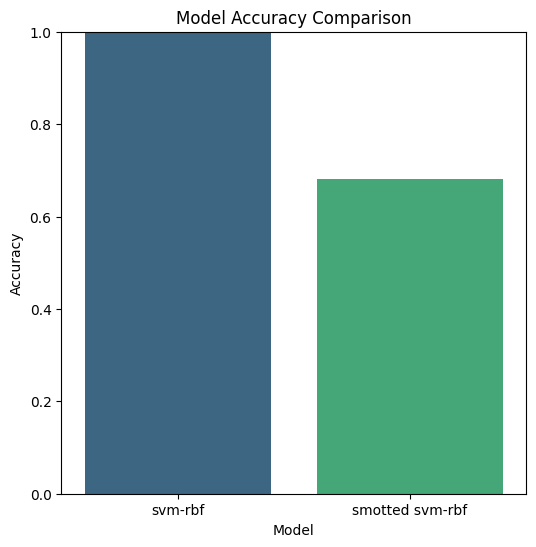

In [ ]:
model_n=['svm-rbf','smotted svm-rbf']
accuracy=[sracc,sracc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

**RANDOMFOREST**

<ipython-input-260-a9f85c6ef503>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


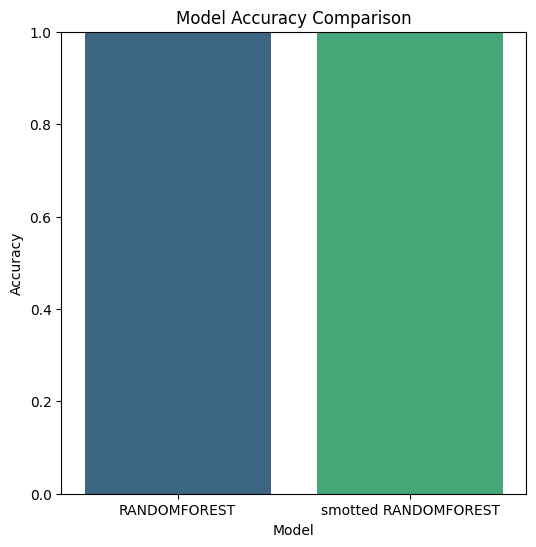

In [ ]:
model_n=['RANDOMFOREST','smotted RANDOMFOREST']
accuracy=[rfacc,rfacc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

**ADABOOST**

<ipython-input-261-2e62646d978a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


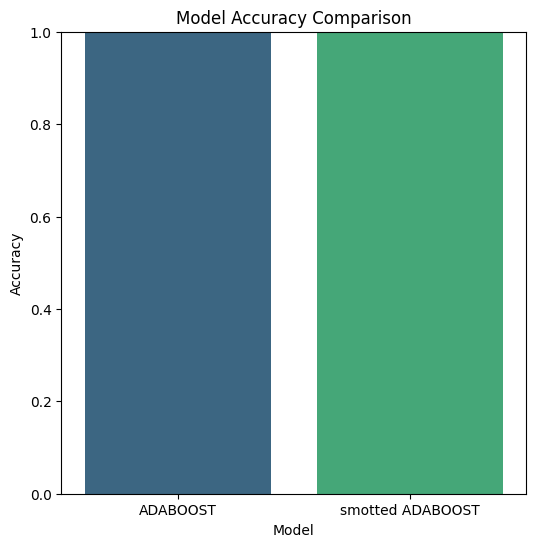

In [ ]:
model_n=['ADABOOST','smotted ADABOOST']
accuracy=[adacc,adacc1]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

overall model comparison

<ipython-input-262-30fad8aca564>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_n, y=accuracy, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-l

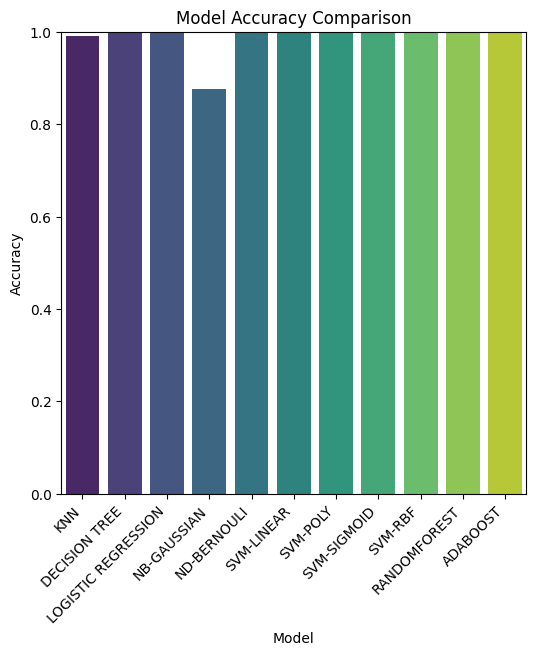

In [ ]:
model_n=['KNN','DECISION TREE','LOGISTIC REGRESSION','NB-GAUSSIAN','ND-BERNOULI','SVM-LINEAR','SVM-POLY','SVM-SIGMOID','SVM-RBF','RANDOMFOREST','ADABOOST']
accuracy=[kacc,dacc,lacc,gacc,bacc,slacc,spacc,ssacc,sracc,rfacc,adacc]

plt.figure(figsize=(6, 6))
sns.barplot(x=model_n, y=accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.xticks(rotation=45, ha='right')
plt.show()

**KNN**:-

accuracy=0.9915

training score=1.0

testing score=0.9915

**SMOTTED KNN**

accuracy=0.782

training score=1.0

testing score=0.782

**DECISION TREE**

accuracy=1.0

trainingscore=1.0

testing score=1.0

**SMOTTED DECISION TREE**

accuracy=1.0

trainingscore=1.0

testing score=1.0



**LOGISTIC REGRESSION**

accuracy=1.0

trainingscore=1.0

testing score=1.0

**SMOTTED LOGISTIC REGRESSION**

accuracy=0.6325

trainingscore=1.0

testing score=0.6325

**Naive Bayes-Gaussian**

accuracy=0.877

trainingscore=1.0

testing score=0.877

**SMOTTED Naive Bayes-Gaussian**

accuracy=0.877

trainingscore=1.0

testing score=0.877

**Naive Bayes-Bernoulli**

accuracy=1.0

trainingscore=1.0

testing score=1.0

**SMOTTED Naive Bayes-Bernoulli**

accuracy=1.0

trainingscore=1.0

testing score=1.0

**SVM:-**

**LINEAR**

accuracy=1.0

trainingscore=1.0

testing score=1.0

**SMOTTED LINEAR**

accuracy=0.6325

trainingscore=1.0

testing score=0.6325

**POLY**

accuracy=1.0

trainingscore=1.0

testing score=1.0

**SMOTTED POLY**

accuracy=0.633

trainingscore=1.0

testing score=0.633

**SIGMOID**

accuracy=0.9995

trainingscore=0.998375

testing score=0.9995

**SMOTTED SIGMOID**

accuracy=0.65

trainingscore=0.9959174903308982

testing score=0.65

**RBF**

accuracy=1.0

trainingscore=1.0

testing score=1.0

**SMOTTED RBF**

accuracy=0.68

trainingscore=1.0

testing score=0.68

**ENSAMBLE**

BAGGING:

accuracy=1.0

trainingscore=1.0

testing score=1.0

SMOTTED BAGGING:

accuracy=1.0

trainingscore=1.0

testing score=1.0

BOOSTING:

accuracy=1.0

trainingscore=1.0

testing score=1.0

SMOTTED BOOSTING:

accuracy=1.0

trainingscore=1.0

testing score=1.0

applied grid search to smotted- no change in accuracy

applied randomsearch to knn

in this dataset:

decision tree

decision tree after smotting

logistic regression

bernouli naive bayes

smotting

svm-linear

svm-rbf

svm-poly

randomforeset

smotting

adaboost

smotting

this all models has the highest accuracy of 1 and is the over fit

In conclusion, this supervised machine learning model project has demonstrated the effectiveness of [algorithm/model] in predicting category with high accuracy. Through careful data preprocessing, feature engineering, and hyperparameter tuning, we achieved a performance metric of result on the test set.
